$$\large \color{green}{\textbf{The Value-At-Risk Forecasting for Vietcomebank}}$$ 

$$\large \color{blue}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$



This computer program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.

$$\text{1. Issue}$$

This project is to forecast the Value-At-Risk of the Vietcombank stock

$$\text{2. Methodology}$$

The GARCH model specification

$$\text{Mean equation:}$$
$$r_{t}=\mu + \epsilon_{t}$$

$$\text{Volatility equation:}$$
$$\sigma^{2}_{t}= \omega + \alpha \epsilon^{2}_{t} + \beta\sigma^{2}_{t-1}$$

$$\text{Volatility equation:}$$

$$\epsilon_{t}= \sigma_{t} e_{t}$$

$$e_{t} \sim N(0,1)$$

we use the model to estimate the VaR


Value-at-Risk (VaR) forecasts from GARCH models depend on the conditional mean, the conditional volatility and the quantile of the standardized residuals,

$$\text{VaR}_{t+1|t}=\mu_{t+1} -\sigma_{t+1|t}q_{\alpha} $$


where $q_{\alpha}$ is the $\alpha$ quantile of the standardized residuals, e.g., 5%. It is worth noting that there are a number of methods to calculate this qualtile, such as the parametric (or the variance–covariance approach), the Historical Simulation.


$$\text{3. Dataset}$$ 

One can download the dataset used to replicate my project at my Repositories on the Github site below

https://github.com/phuongvnguyen/The-VaR-Forecast-for-VCB

Or update it at

https://www.vndirect.com.vn/portal/thong-ke-thi-truong-chung-khoan/lich-su-gia.shtml


# Preparing Problem

##  Loading Libraries

In [1]:
import warnings
import itertools
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from arch import arch_model
from arch.univariate import GARCH

## Defining some varibales for printing the result

In [2]:
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

##  Loading Dataset

In [56]:
data = pd.read_excel("VCBdata.xlsx")

# Data Exploration and Preration

## Data exploration

In [57]:
data.head(5)

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
0,2009-06-30,60.0,VCB,60.00,60.00,60.00,294070.0
1,2009-07-01,60.5,VCB,63.00,63.00,59.50,6248390.0
2,2009-07-02,58.0,VCB,59.50,60.00,57.50,1515670.0
3,2009-07-03,56.0,VCB,56.50,57.00,56.00,899720.0
4,2009-07-06,58.5,VCB,56.00,58.50,56.00,1571740.0


## Computing returns
### Picking up the close prices

In [58]:
closePrice = data[['DATE','CLOSE']]
closePrice.head(5)

,DATE,CLOSE
0,2009-06-30,60.0
1,2009-07-01,60.5
2,2009-07-02,58.0
3,2009-07-03,56.0
4,2009-07-06,58.5


### Computing the daily returns

In [59]:
closePrice['Return'] = closePrice['CLOSE'].pct_change()
closePrice.head()

,DATE,CLOSE,Return
0,2009-06-30,60.0,NaN
1,2009-07-01,60.5,0.008333
2,2009-07-02,58.0,-0.041322
3,2009-07-03,56.0,-0.034483
4,2009-07-06,58.5,0.044643


In [60]:
daily_return=closePrice[['DATE','Return']]
daily_return.head()

,DATE,Return
0,2009-06-30,NaN
1,2009-07-01,0.008333
2,2009-07-02,-0.041322
3,2009-07-03,-0.034483
4,2009-07-06,0.044643


### Reseting index

In [61]:
daily_return =daily_return.set_index('DATE')
daily_return.head()

,Return
DATE,
2009-06-30,NaN
2009-07-01,0.008333
2009-07-02,-0.041322
2009-07-03,-0.034483
2009-07-06,0.044643


In [62]:
daily_return = 100 * daily_return.dropna()
daily_return.head()

,Return
DATE,
2009-07-01,0.833333
2009-07-02,-4.132231
2009-07-03,-3.448276
2009-07-06,4.464286
2009-07-07,-3.418803


In [63]:
daily_return.index

DatetimeIndex(['2009-07-01', '2009-07-02', '2009-07-03', '2009-07-06',
               '2009-07-07', '2009-07-08', '2009-07-09', '2009-07-10',
               '2009-07-13', '2009-07-14',
               ...
               '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='DATE', length=2623, freq=None)

### Plotting returns

Text(0.5, 0, 'Source: The Daily Close Price-based Calculations')

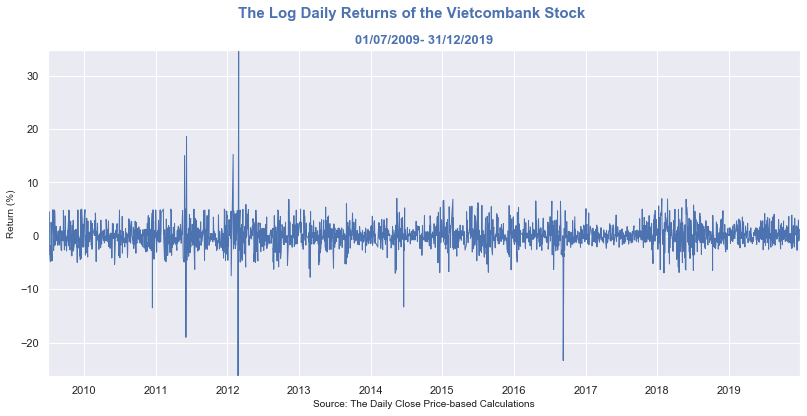

In [65]:
sns.set()
fig=plt.figure(figsize=(12,6))
plt.plot(daily_return.Return[:'2019'],LineWidth=1)
plt.autoscale(enable=True,axis='both',tight=True)
#plt.grid(linestyle=':',which='both',linewidth=2)
fig.suptitle('The Log Daily Returns of the Vietcombank Stock', fontsize=15,fontweight='bold'
             ,color='b')
plt.title('01/07/2009- 31/12/2019',fontsize=13,fontweight='bold',
          color='b')
plt.ylabel('Return (%)',fontsize=10)
plt.xlabel('Source: The Daily Close Price-based Calculations',fontsize=10,fontweight='normal',color='k')

# Modelling GARCH model

$$\text{Mean equation:}$$
$$r_{t}=\mu + \epsilon_{t}$$

$$\text{Volatility equation:}$$
$$\sigma^{2}_{t}= \omega + \alpha \epsilon^{2}_{t} + \beta\sigma^{2}_{t-1}$$

$$\text{Volatility equation:}$$

$$\epsilon_{t}= \sigma_{t} e_{t}$$

$$e_{t} \sim N(0,1)$$


In [66]:
for row in daily_return.index: 
    print(row)

2009-07-01 00:00:00
2009-07-02 00:00:00
2009-07-03 00:00:00
2009-07-06 00:00:00
2009-07-07 00:00:00
2009-07-08 00:00:00
2009-07-09 00:00:00
2009-07-10 00:00:00
2009-07-13 00:00:00
2009-07-14 00:00:00
2009-07-15 00:00:00
2009-07-16 00:00:00
2009-07-17 00:00:00
2009-07-20 00:00:00
2009-07-21 00:00:00
2009-07-22 00:00:00
2009-07-23 00:00:00
2009-07-24 00:00:00
2009-07-27 00:00:00
2009-07-28 00:00:00
2009-07-29 00:00:00
2009-07-30 00:00:00
2009-07-31 00:00:00
2009-08-03 00:00:00
2009-08-04 00:00:00
2009-08-05 00:00:00
2009-08-06 00:00:00
2009-08-07 00:00:00
2009-08-10 00:00:00
2009-08-11 00:00:00
2009-08-12 00:00:00
2009-08-13 00:00:00
2009-08-14 00:00:00
2009-08-17 00:00:00
2009-08-18 00:00:00
2009-08-19 00:00:00
2009-08-20 00:00:00
2009-08-21 00:00:00
2009-08-24 00:00:00
2009-08-25 00:00:00
2009-08-26 00:00:00
2009-08-27 00:00:00
2009-08-28 00:00:00
2009-08-31 00:00:00
2009-09-01 00:00:00
2009-09-03 00:00:00
2009-09-04 00:00:00
2009-09-07 00:00:00
2009-09-08 00:00:00
2009-09-09 00:00:00


2013-10-31 00:00:00
2013-11-01 00:00:00
2013-11-04 00:00:00
2013-11-05 00:00:00
2013-11-06 00:00:00
2013-11-07 00:00:00
2013-11-08 00:00:00
2013-11-11 00:00:00
2013-11-12 00:00:00
2013-11-13 00:00:00
2013-11-14 00:00:00
2013-11-15 00:00:00
2013-11-18 00:00:00
2013-11-19 00:00:00
2013-11-20 00:00:00
2013-11-21 00:00:00
2013-11-22 00:00:00
2013-11-25 00:00:00
2013-11-26 00:00:00
2013-11-27 00:00:00
2013-11-28 00:00:00
2013-11-29 00:00:00
2013-12-02 00:00:00
2013-12-03 00:00:00
2013-12-04 00:00:00
2013-12-05 00:00:00
2013-12-06 00:00:00
2013-12-09 00:00:00
2013-12-10 00:00:00
2013-12-11 00:00:00
2013-12-12 00:00:00
2013-12-13 00:00:00
2013-12-16 00:00:00
2013-12-17 00:00:00
2013-12-18 00:00:00
2013-12-19 00:00:00
2013-12-20 00:00:00
2013-12-23 00:00:00
2013-12-24 00:00:00
2013-12-25 00:00:00
2013-12-26 00:00:00
2013-12-27 00:00:00
2013-12-30 00:00:00
2013-12-31 00:00:00
2014-01-02 00:00:00
2014-01-03 00:00:00
2014-01-06 00:00:00
2014-01-07 00:00:00
2014-01-08 00:00:00
2014-01-09 00:00:00


2017-11-03 00:00:00
2017-11-06 00:00:00
2017-11-07 00:00:00
2017-11-08 00:00:00
2017-11-09 00:00:00
2017-11-10 00:00:00
2017-11-13 00:00:00
2017-11-14 00:00:00
2017-11-15 00:00:00
2017-11-16 00:00:00
2017-11-17 00:00:00
2017-11-20 00:00:00
2017-11-21 00:00:00
2017-11-22 00:00:00
2017-11-23 00:00:00
2017-11-24 00:00:00
2017-11-27 00:00:00
2017-11-28 00:00:00
2017-11-29 00:00:00
2017-11-30 00:00:00
2017-12-01 00:00:00
2017-12-04 00:00:00
2017-12-05 00:00:00
2017-12-06 00:00:00
2017-12-07 00:00:00
2017-12-08 00:00:00
2017-12-11 00:00:00
2017-12-12 00:00:00
2017-12-13 00:00:00
2017-12-14 00:00:00
2017-12-15 00:00:00
2017-12-18 00:00:00
2017-12-19 00:00:00
2017-12-20 00:00:00
2017-12-21 00:00:00
2017-12-22 00:00:00
2017-12-25 00:00:00
2017-12-26 00:00:00
2017-12-27 00:00:00
2017-12-28 00:00:00
2017-12-29 00:00:00
2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-05 00:00:00
2018-01-08 00:00:00
2018-01-09 00:00:00
2018-01-10 00:00:00
2018-01-11 00:00:00
2018-01-12 00:00:00


In [67]:
#garch = arch_model(daily_return,mean='AR',lags=5,
 #                  vol='GARCH',dist='studentst',
  #              p=1, o=0, q=1)
garch = arch_model(daily_return,vol='Garch', p=1, o=0, q=1, dist='skewt')
results_garch = garch.fit(last_obs='2018-12-28', update_freq=1,disp='on')
print(results_garch.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4984.448385710746
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4982.342503865126
Iteration:      3,   Func. Count:     29,   Neg. LLF: 4980.551192340077
Iteration:      4,   Func. Count:     38,   Neg. LLF: 4968.006442163338
Iteration:      5,   Func. Count:     48,   Neg. LLF: 4964.32155745197
Iteration:      6,   Func. Count:     58,   Neg. LLF: 4963.593086697393
Iteration:      7,   Func. Count:     67,   Neg. LLF: 4962.995295452902
Iteration:      8,   Func. Count:     76,   Neg. LLF: 4962.076872000405
Iteration:      9,   Func. Count:     84,   Neg. LLF: 4961.442724541429
Iteration:     10,   Func. Count:     92,   Neg. LLF: 4961.201139653574
Iteration:     11,   Func. Count:    100,   Neg. LLF: 4961.084150601387
Iteration:     12,   Func. Count:    108,   Neg. LLF: 4961.0659221257665
Iteration:     13,   Func. Count:    116,   Neg. LLF: 4961.063569282921
Iteration:     14,   Func. Count:    124,   Neg. LLF: 4961.06345

# Estimating the VaR

we use the model to estimate the VaR


Value-at-Risk (VaR) forecasts from GARCH models depend on the conditional mean, the conditional volatility and the quantile of the standardized residuals,

$$\text{VaR}_{t+1|t}=\mu_{t+1} -\sigma_{t+1|t}q_{\alpha} $$


where $q_{\alpha}$ is the $\alpha$ quantile of the standardized residuals, e.g., 5%.

## Computing the quantiles

### The Filtered Historical Simulation

The quantiles, $q_{\alpha}$, can be computed using the Filtered Historical Simulation below.

#### Computing the standardized residuals

It is worth noting that the standardized residuals computed by conditional volatility as follows.

In [68]:
std_garch = (daily_return.Return[:'2018'] - results_garch.params['mu']) / results_garch.conditional_volatility
std_garch = std_garch.dropna()
std_garch.head(5)

DATE
2009-07-01    0.264728
2009-07-02   -1.504713
2009-07-03   -1.100028
2009-07-06    1.375930
2009-07-07   -0.967195
dtype: float64

#### Computing the Quantiles

At the probabilities of 1% and 5%

In [69]:
FHS_quantiles_VaRgarch = std_garch.quantile([.01, .05])
print(Bold+'The quantiles at the probabilities of 1% and 5% are as follows'+End)
print(FHS_quantiles_VaRgarch)

The quantiles at the probabilities of 1% and 5% are as follows
0.01   -2.611382
0.05   -1.444207
dtype: float64


#### Computing the conditional mean and volatilitie

In [70]:
FHS_forecasts_VaRgarch = results_garch.forecast(start='2019-01-02')
FHS_cond_mean_VaRgarch = FHS_forecasts_VaRgarch.mean['2019':]
FHS_cond_var_VaRgarch = FHS_forecasts_VaRgarch.variance['2019':]


#### Computing the Value-At-Risk (VaR)

In [75]:
FHS_value_at_risk = -FHS_cond_mean_VaRgarch.values - np.sqrt(FHS_cond_var_VaRgarch).values * FHS_quantiles_VaRgarch[None, :]

FHS_value_at_risk = pd.DataFrame(
    FHS_value_at_risk, columns=['1%', '5%'], index=FHS_cond_var_VaRgarch.index)

FHS_value_at_risk.head(5)

,1%,5%
DATE,,
2019-01-02,3.981708,2.194922
2019-01-03,3.796469,2.092477
2019-01-04,4.086845,2.253067
2019-01-07,3.902609,2.151176
2019-01-08,3.839510,2.116280


#### Visualizing the VaR vs actual values
##### Picking actual data

In [76]:
rets_2019= daily_return['2019':].copy()
rets_2019.name = 'Return'
rets_2019.head(5)

,Return
DATE,
2019-01-02,0.186916
2019-01-03,0.000000
2019-01-04,1.492537
2019-01-07,0.367647
2019-01-08,0.732601


##### Plotting

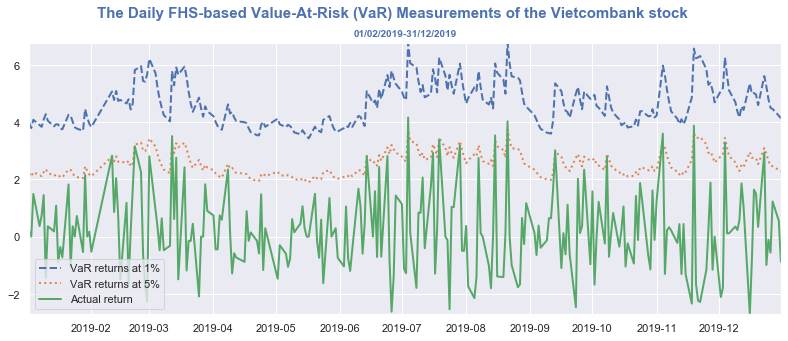

In [78]:
fig=plt.figure(figsize=(12,5))
plt.plot(FHS_value_at_risk['1%'] ,LineWidth=2,
         linestyle='--',label='VaR returns at 1%')
plt.plot(FHS_value_at_risk['5%'] ,LineWidth=2,
         linestyle=':',label='VaR returns at 5%')
plt.plot(rets_2019['Return'] ,LineWidth=2,
         linestyle='-',label='Actual return')
plt.suptitle('The Daily FHS-based Value-At-Risk (VaR) Measurements of the Vietcombank stock', 
             fontsize=15,fontweight='bold',
            color='b')
plt.title('01/02/2019-31/12/2019',fontsize=10,
          fontweight='bold',color='b')
plt.autoscale(enable=True,axis='both',tight=True)
plt.legend()

### Parametric Method

#### Computing the quantile

In [81]:
param_quantiles_VaRgarch = garch.distribution.ppf([0.01, 0.05], results_garch.params[-2:])
print(Bold+'The quantiles at the probabilities of 1% and 5% are as follows'+End)
print(param_quantiles_VaRgarch)



The quantiles at the probabilities of 1% and 5% are as follows
[-2.48958686 -1.4291926 ]


#### Computing the conditional mean and volatilitie

In [82]:
param_forecasts_VaRgarch = results_garch.forecast(start='2019-01-02')
param_cond_mean_VaRgarch = param_forecasts_VaRgarch.mean['2019':]
param_cond_var_VaRgarch = param_forecasts_VaRgarch.variance['2019':]


#### Computing the Value-At-Risk (VaR)

In [83]:
param_value_at_risk = -param_cond_mean_VaRgarch.values - np.sqrt(param_cond_var_VaRgarch).values * param_quantiles_VaRgarch[None, :]

param_value_at_risk = pd.DataFrame(
    param_value_at_risk, columns=['1%', '5%'], index=param_cond_var_VaRgarch.index)

param_value_at_risk.head(5)

,1%,5%
DATE,,
2019-01-02,3.795257,2.171937
2019-01-03,3.618658,2.070557
2019-01-04,3.895490,2.229478
2019-01-07,3.719847,2.128647
2019-01-08,3.659691,2.094113


#### Visualizing the VaR vs actual values


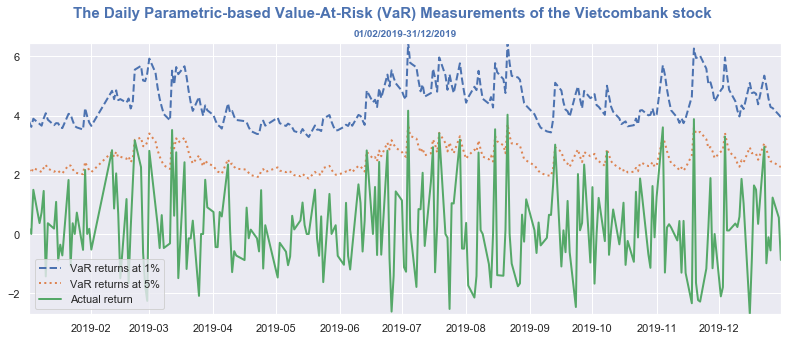

In [84]:
fig=plt.figure(figsize=(12,5))
plt.plot(param_value_at_risk['1%'] ,LineWidth=2,
         linestyle='--',label='VaR returns at 1%')
plt.plot(param_value_at_risk['5%'] ,LineWidth=2,
         linestyle=':',label='VaR returns at 5%')
plt.plot(rets_2019['Return'] ,LineWidth=2,
         linestyle='-',label='Actual return')
plt.suptitle('The Daily Parametric-based Value-At-Risk (VaR) Measurements of the Vietcombank stock', 
             fontsize=15,fontweight='bold',
            color='b')
plt.title('01/02/2019-31/12/2019',fontsize=10,
          fontweight='bold',color='b')
plt.autoscale(enable=True,axis='both',tight=True)
plt.legend()